In [2]:
#cài đặt thư viện
import numpy as np
import cv2
import subprocess
import shlex
import matplotlib.pyplot as plt
from PIL import Image
import math
import datetime
import json
import imgcompare

with open('.vscode\settings.json', 'r', encoding='utf-8') as f:
    seting = json.load(f)

seting['jupyter.jupyterServerType']

'local'

## Super parameter

In [3]:
[[345, 287], [438, 290],  [288, 75], [266, 76]]
[4, 16], [42, 16],   [166, 188], [55, 188]
lst_roi = [[50, 0], [193, 0], [200, 200], [200, 200]]
lst_roi2 = [[60, 0], [220, 0], [220, 200], [175, 200]]
lst_roi1 = [[0, 0], [0, 4], [1, 200], [70, 193]]
roif = (296, 135, 146, 155)
roib = (292, 135, 156, 156)

# Function another


#### Get url and save image

In [4]:
#thiết lập thông số
url_temp = '''curl "http://giaothong.hochiminhcity.gov.vn:8007/Render/CameraHandler.ashx?id=587c79e9b807da0011e33d3d&bg=black"   -H "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9"   -H "Accept-Language: vi-VN,vi;q=0.9,fr-FR;q=0.8,fr;q=0.7,en-US;q=0.6,en;q=0.5,ja;q=0.4"   -H "Cache-Control: no-cache"   -H "Connection: keep-alive"   -H "Cookie: GUEST_LANGUAGE_ID=vi_VN; _ga=GA1.3.1268639869.1637042764; ASP.NET_SessionId=whhmth0edrixbfoydshhg321; .VDMS=2CF9AF29877107034C56C9D51CBEAE47FD899DED662CFBB5CBCEC7A62F97DB60F5C8FE341A12F6AD3E69E32B9546499219D77B0A76197BD52BF5F71C799B7F95E1A68A7D5A94399BE5C38D66786A8983ECBD5FB32FC51D47CE7DCF103EE11B65EDACE38441D20196BAAA45CC40CC32998E1D7AE4; _frontend=\u0021nw6dooWn8pGIKqFmil1P2lbeEwNhYVww9WP2z4x6h9kTylkUspJirO5K6GJzkWZkAtNCeYsAB3gpIT8=; CurrentLanguage=vi; _gid=GA1.3.446387129.1652343216; _pk_ref.1.2f14=%5B%22%22%2C%22%22%2C1652343216%2C%22https%3A%2F%2Fwww.google.com%2F%22%5D; _pk_id.1.2f14=a912fbe1c12c6e6e.1652249178.2.1652343264.1652343216."   -H "Pragma: no-cache"   -H "Upgrade-Insecure-Requests: 1"   -H "User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36"   --compressed   --insecure --output test/CAM_DBP/root/img_test'''

In [5]:
def getUrl_saveImage_temp(url, index):
    process = subprocess.Popen(url + str(index) + '''.png''', shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    print(stdout + stderr)
    # img = cv2.imdecode(np.fromstring(stdout, dtype=np.uint8), 1)

#### Display image

In [6]:
#display image
def display_image(img):
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

#### Perform Histogram

In [7]:

#using numpy
def performHistogram(img):
    h2 = np.histogram(img.ravel(), bins=256, range=[0,256])
    print(h2[0].shape)
    plt.plot(h2[0])


#### Preprocessing image

In [8]:
def preprocessing_image(img):
    #convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.multiply(gray, 1.5)
    
    #blur remove noise
    blured1 = cv2.medianBlur(gray,3)
    blured2 = cv2.medianBlur(gray,47)
    divided = np.ma.divide(blured1, blured2).data
    normed = np.uint8(255*divided/divided.max())
    
    #Threshold image
    th, threshed = cv2.threshold(normed, 0, 255,cv2.THRESH_OTSU+  cv2.THRESH_BINARY)
    
    return threshed

In [9]:
#Làm mờ
#blur image
def blur_color_img(img, kernel_width=5, kernel_height=5, sigma_x=2, sigma_y=2):
    #increse brightness for foreground
    
    img = np.copy(img) # we don't modify the original image
    img[:,:,0] = cv2.GaussianBlur(img[:,:,0], ksize=(kernel_width, kernel_height), sigmaX=sigma_x, sigmaY=sigma_y)
    img[:,:,1] = cv2.GaussianBlur(img[:,:,1], ksize=(kernel_width, kernel_height), sigmaX=sigma_x, sigmaY=sigma_y)
    img[:,:,2] = cv2.GaussianBlur(img[:,:,2], ksize=(kernel_width, kernel_height), sigmaX=sigma_x, sigmaY=sigma_y)
    # blured1 = cv2.medianBlur(img,3)
    # blured2 = cv2.medianBlur(img,51)
    # img = cv2.GaussianBlur(img, (5, 5), 0)
    return img

In [10]:
#Làm mờ
#blur image
def blur_color_img_hsv(img, kernel_width=5, kernel_height=5, sigma_x=2, sigma_y=2):
    #increse brightness for foreground
    
    img = np.copy(img) # we don't modify the original image
    img = cv2.GaussianBlur(img, (5, 5), 0)
    return img

#### Crop image

In [11]:
def crop_image(image):
    image_arr = np.array(image)
    image_arr = image_arr[92:287, 269:454]
    image = Image.fromarray(image_arr)
    return image_arr

In [12]:
def cropImageRoi(image, roi):
    roi_cropped = image[
        int(roi[1]) : int(roi[1] + roi[3]), int(roi[0]) : int(roi[0] + roi[2])
    ]
    return roi_cropped

####  Get condinates of the point when clicked

In [13]:

def click_event(event, x, y, flags, params):
    img = img
    # lst = list()
    if event == cv2.EVENT_LBUTTONDOWN:
        #display on shell
        print(x, ' ', y)
        # child_lst = list(x, y)
        # lst.append(child_lst)
        #display on image
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)
        
    if event == cv2.EVENT_RBUTTONDOWN:
        #display on shell
        print (x, ' ', y)
        # child_lst1 = list(x, y)
        # lst.append(child_lst1)
        #display on screen window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)
    # return lst
        

In [14]:
def roiPoint(img):
    cv2.imshow("image", img)
    cv2.setMouseCallback("image", click_event)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

#### Get ROI use fillPoly

In [15]:
def roiFillPoly(img, lst):
    points = np.array(lst)
    temp_img = cv2.fillPoly(img, pts = [points], color = (0, 0, 0))    
    return temp_img

#### Binary Image

In [16]:
def binaryImage(img):
    #convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.multiply(gray, 1.5)
    
    #blur remove noise
    blured1 = cv2.medianBlur(gray,3)
    blured2 = cv2.medianBlur(gray,47)
    divided = np.ma.divide(blured1, blured2).data
    normed = np.uint8(255*divided/divided.max())
    
    #Threshold image
    th, threshed = cv2.threshold(normed, 0, 255, cv2.THRESH_OTSU+ cv2.THRESH_BINARY)
    
    return threshed

#### Background Subtraction

In [17]:
#background subtraction
def background_subtraction(fg_img, bg_img, diff_threshold=100):
    fg_img = blur_color_img(fg_img)
    bg_img = blur_color_img(bg_img)
    mask = fg_img - bg_img
    mask = np.abs(mask)
    mask = np.mean(mask, axis=2, keepdims=False)
    mask[mask>diff_threshold] = 255
    mask[mask >= diff_threshold] = 0
    mask = mask.astype(np.uint8)
    mask = cv2.medianBlur(mask, 7)
    return mask

In [18]:
#excute
def main(foreground_img, background_img):
    fg_img = (foreground_img) # [h, w, 3]
    bg_img = (background_img) # [h, w, 3]
    mask = background_subtraction(fg_img, bg_img)
    new_fg = np.zeros([fg_img.shape[0], fg_img.shape[1], 4]) # png image --> has 4-dims instead of 3-dims like color image
    new_fg[:,:,:3] = fg_img
    new_fg[:,:,3] = mask
    cv2.imwrite('mask.jpg', mask)
    cv2.imwrite('test1.png', new_fg)
    display_image(mask)

#### Test subtraction without convert hsl for two image 

In [19]:
def backSubtraction_hsv(bg_cropImageFill, fg_cropImageFill):   
    #get brightness betweet two image to balance about lightness 
    fg_cropImageFill_hsl = cv2.cvtColor(fg_cropImageFill, cv2.COLOR_RGB2HLS)
    delta = cv2.cvtColor(fg_cropImageFill, cv2.COLOR_RGB2HLS)[:, :, 0].mean() - cv2.cvtColor(bg_cropImageFill, cv2.COLOR_RGB2HLS)[:, :, 0].mean()
    np.add(fg_cropImageFill_hsl[:, :, 0], delta, out=fg_cropImageFill_hsl[:, :, 0], casting="unsafe")
    fg_cropImageFill_hsl = cv2.cvtColor(fg_cropImageFill_hsl, cv2.COLOR_HLS2RGB)

        # display_image(fg_cropImageFill_Blur)
    
    fg_cropImageFill_Blur = cv2.cvtColor(fg_cropImageFill, cv2.COLOR_RGB2HSV)
    bg_cropImageFill_Blur = cv2.cvtColor(bg_cropImageFill, cv2.COLOR_RGB2HSV)

    bg_cropImageFill_Blur = blur_color_img_hsv(bg_cropImageFill)
    fg_cropImageFill_Blur = blur_color_img_hsv(fg_cropImageFill)

    mask = fg_cropImageFill_Blur - bg_cropImageFill_Blur
    mask = np.abs(mask)

    # blur_color_img(mask)
    # mask_hsl = cv2.cvtColor(mask, cv2.COLOR_RGB2HLS)
    print("kt1", fg_cropImageFill_Blur[0], "\nkt 2", fg_cropImageFill_Blur[184])
    # print(mask[:, 0, 0], mask[0, :, 0], mask[0, 0, :])
    # print(mask)
    lower_thread = np.array([0, 0, 0])
    upper_thread = np.array([180, 255, 255])
    mask_test = cv2.inRange(mask, lower_thread, upper_thread)
    res = cv2.bitwise_and(fg_cropImageFill, bg_cropImageFill, mask_test)
    # cv2.imshow("image", mask)
    # cv2.imshow("image 1", res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return mask_test
    np.stack(axis=0)
    #HỎI: XĐ VÙNG ĐÓ NHƯNG SAO KHÔNG PHẢI LẤY MÀU ĐƯỢC VÙNG MÀU TRẮNG

In [20]:
def backSubtraction(bg_cropImageFill, fg_cropImageFill):   
    #get brightness betweet two image to balance about lightness 
    fg_cropImageFill_hsl = cv2.cvtColor(fg_cropImageFill, cv2.COLOR_RGB2HLS)
    delta = cv2.cvtColor(fg_cropImageFill, cv2.COLOR_RGB2HLS)[:, :, 2].mean() - cv2.cvtColor(bg_cropImageFill, cv2.COLOR_RGB2HLS)[:, :, 2].mean()
    np.add(fg_cropImageFill_hsl[:, :, 2], delta, out=fg_cropImageFill_hsl[:, :, 2], casting="unsafe")
    fg_cropImageFill_hsl = cv2.cvtColor(fg_cropImageFill_hsl, cv2.COLOR_HLS2RGB)

    bg_cropImageFill_Blur = blur_color_img(bg_cropImageFill)
    fg_cropImageFill_Blur = blur_color_img(fg_cropImageFill_hsl)
    # display_image(fg_cropImageFill_Blur)
    
    mask = fg_cropImageFill_Blur - bg_cropImageFill_Blur
    mask = np.abs(mask)
    # blur_color_img(mask)
    mask_hsl = cv2.cvtColor(mask, cv2.COLOR_RGB2HLS)

    lower_thread = np.array([8, 100, 50])
    upper_thread = np.array([180, 255, 255])
    mask_test = cv2.inRange(mask_hsl, lower_thread, upper_thread)
    res = cv2.bitwise_and(fg_cropImageFill, bg_cropImageFill, mask_test)
    return mask_test

In [21]:
def preprocessing(mask_test):
    kernel = np.ones((5,5), np.uint8)
    fgMask = cv2.erode(mask_test, kernel, iterations=1) 
    fgMask = cv2.dilate(fgMask, kernel, iterations=1)
    fgMask = cv2.GaussianBlur(fgMask, (3,3), 0)
    fgMask = cv2.morphologyEx(fgMask, cv2.MORPH_CLOSE, kernel)
    _,fgMask = cv2.threshold(fgMask,0,255,cv2.THRESH_BINARY)
    # cv2.imshow("image",fgMask)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    return fgMask
    # display_image(fgMask)

In [22]:
#image processsing of bro. PhamDinhKhanh 
def boudingBox(fg_cropImageRoi, fgMask):
    fg = fg_cropImageRoi.copy()
    cordinate = 0
    #You can choose type connectivity with value about from 4 to 8
    connectivity = 4
    output = cv2.connectedComponentsWithStats(fgMask, connectivity, cv2.CV_32S)
    (numLabels, labels, stats, centroids) = output
    for i in  range(0, numLabels):
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
        if (area > 300) and (w > 30) and (h > 30) and (w < fg.shape[0]) and (h < fg.shape[1]):
            cv2.rectangle(fg, (x, y), (x + w, y + h), (0, 255, 0), 1)
            cordinate = [x, y, x + w, y + h]
    
    # cv2.imshow('Roi Image 2' , fg)
    time = datetime.datetime.now()
    cv2.imwrite("test/CAM_DBP/result/" + str(str(time).replace(" ","_").replace(":","-").split(".")[0]) + ".png", fg)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return cordinate, fg

# test 30/05

In [23]:
getUrl_saveImage_temp(url_temp, 27)

b'  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current\r\n                                 Dload  Upload   Total   Spent    Left  Speed\r\n\r  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0\r100 50088  100 50088    0     0   400k      0 --:--:-- --:--:-- --:--:--  404k\r\n'


In [24]:


def detect_Obj(f, b):
    fg_cropImageRoi = cropImageRoi(f, roif)
    bg_cropImageRoi = cropImageRoi(b, roib)
    bg_cropImageRoi = cv2.resize(bg_cropImageRoi, (195,185))
    fg_cropImageRoi = cv2.resize(fg_cropImageRoi, (195,185))

    bg_cropImageFill = roiFillPoly(bg_cropImageRoi, lst_roi1)
    bg_cropImageFill = roiFillPoly(bg_cropImageFill , lst_roi2)

    temp = fg_cropImageRoi.copy()
    fg_cropImageFill = roiFillPoly(temp, lst_roi1)
    fg_cropImageFill = roiFillPoly(temp, lst_roi2)
    # fg_cropImageFill = cv2.imread("after_shadow_remove2.png")
    # bg_cropImageFill = cv2.imread("after_shadow_remove1.png")
    # # display_image(bg_cropImageFill)
    # # display_image(fg_cropImageFill)
    mask = backSubtraction(bg_cropImageFill, fg_cropImageFill)
    # display_image(mask)
    fgMask = preprocessing(mask_test= mask)
    cv2.imwrite("test_brightness.png", fgMask)
    cordinate, fg = boudingBox( fg_cropImageRoi, fgMask= fgMask)
    return cordinate, fg


In [25]:
def diff_frame(image1, image2, cordinate):
    #Cut image to compare
    percentage = float(1)
    result = cropImageRoi(cropImageRoi(image1, roif), cordinate)
    test = cropImageRoi(cropImageRoi(image2, roif), cordinate)
    
    cv2.imwrite("test\CAM_DBP\\test\\result.png", result)
    cv2.imwrite("test\CAM_DBP\\test\\test.png", test)

    percentage = imgcompare.image_diff_percent("test\CAM_DBP\\test\\result.png", "test\CAM_DBP\\test\\test.png")
    
    return percentage

In [26]:
# b = cv2.imread("bg_img.png")
# f = cv2.imread("test/CAM_DBP/root/img_test27.png")
# detect_Obj(f, b)

#### test

In [28]:
import numpy as np 

class NumpyStack:
    
    def __init__(self, length):
        """
        Init stack have length
        """
        self.stack = []
        self.length = length

    def pop(self):
        """
        pop last element
        """
        temp = self.stack[-1]
        return temp

    def put(self, value):
        """
        Push in first
        """
        # xoas C1: del self.stack[-1] xoas thawng bo nho
        if self.len == 10:
            del self.stack[0]

        self.stack = self.stack + [value]
        return self.stack

    @property
    def len(self):
        """
        Length of stack
        """
        return len(self.stack)

stack = NumpyStack( 10)


In [30]:
import time
import os
from statistics import mean

url = '''curl "http://giaothong.hochiminhcity.gov.vn:8007/Render/CameraHandler.ashx?id=587c79e9b807da0011e33d3d&bg=black"   -H "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9"   -H "Accept-Language: vi-VN,vi;q=0.9,fr-FR;q=0.8,fr;q=0.7,en-US;q=0.6,en;q=0.5,ja;q=0.4"   -H "Cache-Control: no-cache"   -H "Connection: keep-alive"   -H "Cookie: GUEST_LANGUAGE_ID=vi_VN; _ga=GA1.3.1268639869.1637042764; ASP.NET_SessionId=whhmth0edrixbfoydshhg321; .VDMS=2CF9AF29877107034C56C9D51CBEAE47FD899DED662CFBB5CBCEC7A62F97DB60F5C8FE341A12F6AD3E69E32B9546499219D77B0A76197BD52BF5F71C799B7F95E1A68A7D5A94399BE5C38D66786A8983ECBD5FB32FC51D47CE7DCF103EE11B65EDACE38441D20196BAAA45CC40CC32998E1D7AE4; _frontend=\u0021nw6dooWn8pGIKqFmil1P2lbeEwNhYVww9WP2z4x6h9kTylkUspJirO5K6GJzkWZkAtNCeYsAB3gpIT8=; CurrentLanguage=vi; _gid=GA1.3.446387129.1652343216; _pk_ref.1.2f14=%5B%22%22%2C%22%22%2C1652343216%2C%22https%3A%2F%2Fwww.google.com%2F%22%5D; _pk_id.1.2f14=a912fbe1c12c6e6e.1652249178.2.1652343264.1652343216."   -H "Pragma: no-cache"   -H "Upgrade-Insecure-Requests: 1"   -H "User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36"   --compressed   --insecure '''

def getUrl_saveImage(url):
    process = subprocess.Popen(url , shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    # print(stdout + stderr)
    img = cv2.imdecode(np.fromstring(stdout, dtype=np.uint8), 1)
    return img

stack = NumpyStack(10)
i = -1

while True:
    i += 1
    if i < 10:    
        stack.stack = stack.put(getUrl_saveImage(url))
    else:
        cordinate, fg = detect_Obj(stack.pop(), cv2.imread("bg_img.png"))        
        print(cordinate)
        percentages = []

        if (cordinate != 0):
            for i in range(stack.len-2):
                diff_frame_ = diff_frame(stack.pop(), stack.stack[i], cordinate= cordinate)
                percentages = percentages + [diff_frame_]
            percentage = mean(percentages)  
            print(percentages)
            print(percentage)  
            if (percentage > 10):
                print("Không cảnh báo")
            else:
                print("Cảnh báo")
                cv2.imshow("Image Warning", fg)
                cv2.waitKey(0)
                cv2.destroyAllWindows()

    time.sleep(12.5)

c:\ProgramData\Anaconda3\envs\nckh\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


[20, 19, 69, 58]
[5.052375772897865, 4.62572635251002, 4.543610547667343, 4.714407502131287, 4.610341887879589, 4.817493214177225, 7.943479240771771, 4.797307228738572]
5.138092718346709
Cảnh báo
[71, 32, 103, 77]
[8.503862150920973, 8.261098378745437, 7.796757490875137, 8.092284186401834, 3.510126474832357, 10.785705797470504, 10.047568118156354, 8.045225362872422]
8.130328495034377
Cảnh báo
[26, 20, 68, 58]
[7.753450264487134, 8.548800859086029, 10.01113630036193, 8.469753012766972, 8.5338861711013, 7.627968022908961, 5.767012687427912, 6.102096010818121]
7.851762916119795
Cảnh báo


KeyboardInterrupt: 

#### Test

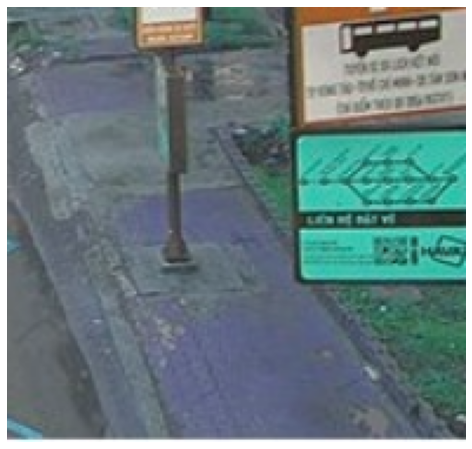

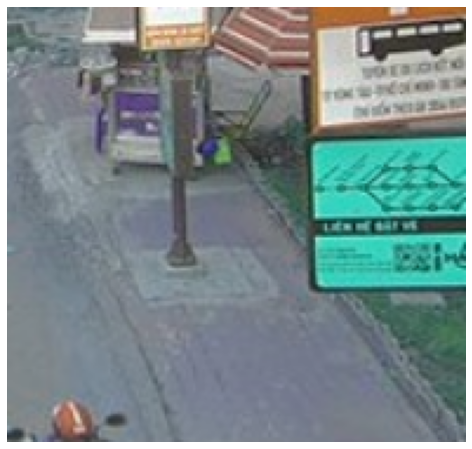

In [66]:
bg_test = cv2.imread("bg_cropImageRoi.png")
display_image(bg_test)
fg_test = cv2.imread("fg_cropImageRoi.png")
display_image(fg_test)

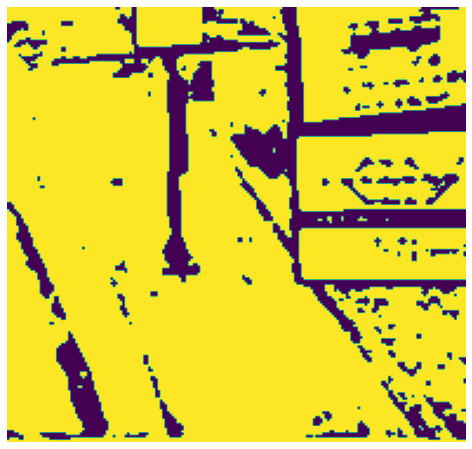

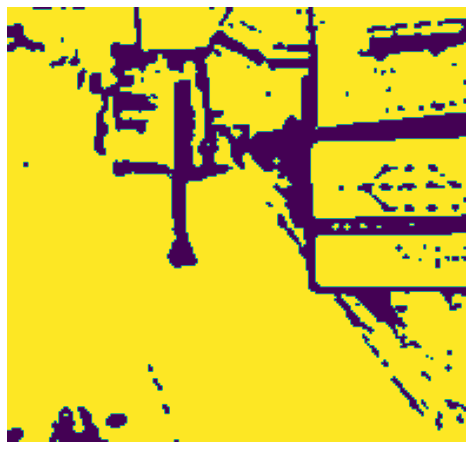

In [67]:
bg_test_threahold = binaryImage(cv2.imread("bg_cropImageRoi.png"))
display_image(bg_test_threahold)
fg_test_threahold = binaryImage(cv2.imread("fg_cropImageRoi.png"))
display_image(fg_test_threahold)

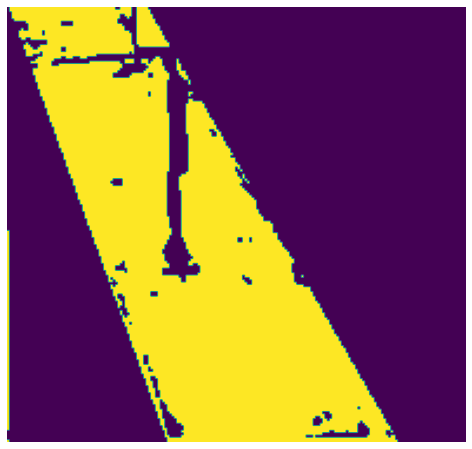

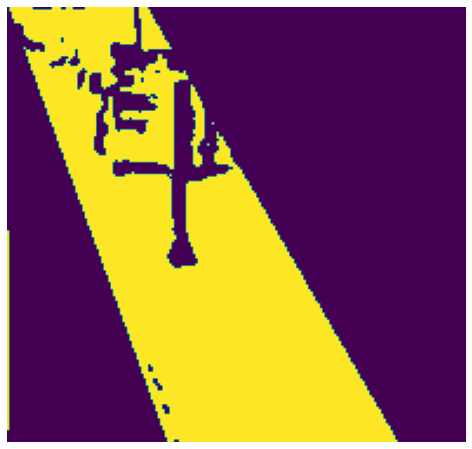

In [68]:
bg_test_roi = roiFillPoly(bg_test_threahold, lst_roi1)
bg_test_roi = roiFillPoly(bg_test_roi, lst_roi2)
display_image(bg_test_roi)
fg_test_roi = roiFillPoly(fg_test_threahold, lst_roi1)
fg_test_roi = roiFillPoly(fg_test_roi, lst_roi2)
display_image(fg_test_roi)

In [69]:
blur_color_img(fg_test_roi)
blur_color_img(bg_test_roi)
mask = fg_test_roi - bg_test_roi
mask = np.abs(mask)
mask[mask == 0] = 0
mask[mask != 0] = 255
display_image(mask)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

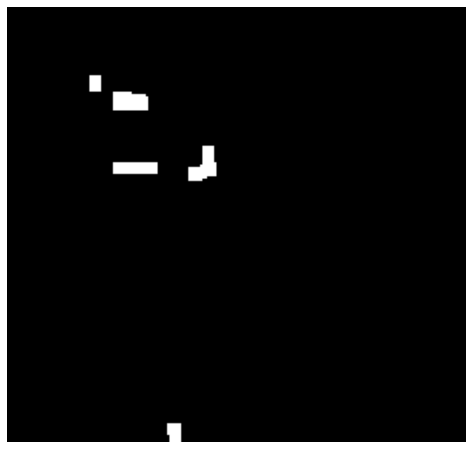

In [ ]:
kernel = np.ones((5,5), np.uint8)
fgMask = cv2.erode(mask, kernel, iterations=1) 
fgMask = cv2.dilate(fgMask, kernel, iterations=1)
fgMask = cv2.GaussianBlur(fgMask, (3,3), 0)
fgMask = cv2.morphologyEx(fgMask, cv2.MORPH_CLOSE, kernel)
_,fgMask = cv2.threshold(fgMask,130,255,cv2.THRESH_BINARY)
display_image(fgMask)

In [ ]:
fgMask = cv2.Canny(fgMask,20,200)
contours,_ = cv2.findContours(fgMask,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    (x, y, w, h) = cv2.boundingRect(contours[i])
    area = cv2.contourArea(contours[i])
    if area > 10:
        cv2.drawContours(fgMask, contours[i], 0, (0, 0, 255), 6)
        cv2.rectangle(fg_test, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv2.imshow('Roi Image', fg_test)
cv2.waitKey(0)
cv2.destroyAllWindows()